# Contour Detection

Contours are defined as the line joining all the points along the boundary of an image or objects within the image that are having the same intensity. Contours come handy in shape analysis, localizing the object of interest, and object detection. 

It is the first step for many image processing applications, such as image-foreground extraction, image segmentation, detection and recognition. 

OpenCV makes it really easy to find and draw contours in images. The following 2 functions enable to find and draw contours of an image:

1. findContours()
2. drawContours()

OpenCV has two different algorithms for contour detection:

1. CHAIN_APPROX_SIMPLE
2. CHAIN_APPROX_NONE

## Steps for Detecting and Drawing Contours

1. Read the Image.
2. Convert it to Grayscale Format.
3. Apply Binary Thresholding.
4. Find the Contours.
5. Draw contours on the original image.

In [1]:
import cv2
from matplotlib import pyplot as plt

### Read the Image

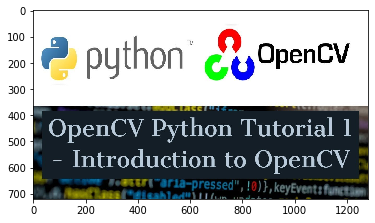

In [2]:
# read the image
image = cv2.imread('Data/open_cv_python.jpg')

# convert the image to rgb format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Grayscale Conversion

In [3]:
# convert the image to grayscale format
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Apply Binary Thresholding

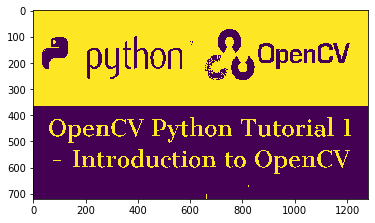

In [4]:
# apply binary thresholding
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

plt.imshow(thresh)

### Find the Contours

In [5]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, 
                                       mode=cv2.RETR_TREE,
                                       method=cv2.CHAIN_APPROX_SIMPLE)
                                 

### Draw contours on the original image

In [6]:
# draw contours on the original image
copyImage = image.copy()

_ = cv2.drawContours(image=copyImage, 
                     contours=contours, 
                     contourIdx=-1, 
                     color=(255, 0, 0),
                     thickness=2, 
                     lineType=cv2.LINE_AA)

### Display Contours

Text(0.5, 1.0, 'Contours')

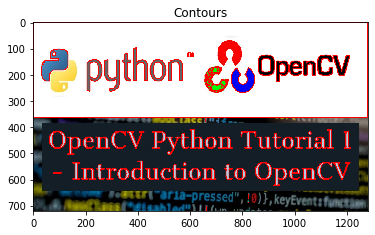

In [7]:
plt.imshow(copyImage)
plt.title("Contours")

## Why Gray Scale and Binarized Images are better for Contours?

In [8]:
import cv2

# read the image
image = cv2.imread('Data/open_cv_python.jpg')

# B, G, R channel splitting
blue, green, red = cv2.split(image)

# detect contours using blue channel and without thresholding
contours1, hierarchy1 = cv2.findContours(image=blue, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_contour_blue = image.copy()
_ = cv2.drawContours(image=image_contour_blue, 
                     contours=contours1, 
                     contourIdx=-1, 
                     color=(255, 0, 0), 
                     thickness=2, 
                     lineType=cv2.LINE_AA)

# detect contours using green channel and without thresholding
contours2, hierarchy2 = cv2.findContours(image=green, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_contour_green = image.copy()
_ = cv2.drawContours(image=image_contour_green, 
                     contours=contours2, 
                     contourIdx=-1, 
                     color=(255, 0, 0), 
                     thickness=2, 
                     lineType=cv2.LINE_AA)

# detect contours using red channel and without thresholding
contours3, hierarchy3 = cv2.findContours(image=red, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_contour_red = image.copy()
_ = cv2.drawContours(image=image_contour_red, 
                     contours=contours3,
                     contourIdx=-1, 
                     color=(255, 0, 0),
                     thickness=2, 
                     lineType=cv2.LINE_AA)

Text(0.5, 1.0, 'Contours on Blue Channel')

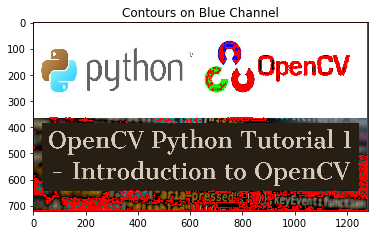

In [9]:
plt.imshow(image_contour_blue)
plt.title("Contours on Blue Channel")

Text(0.5, 1.0, 'Contours on Red Channel')

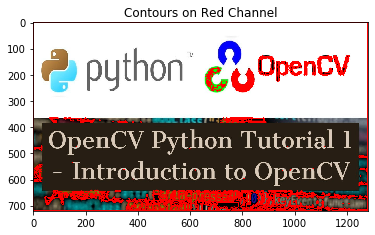

In [10]:
plt.imshow(image_contour_red)
plt.title("Contours on Red Channel")

Text(0.5, 1.0, 'Contours on Green Channel')

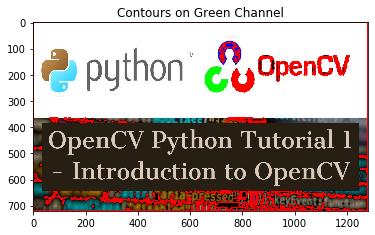

In [11]:
plt.imshow(image_contour_green)
plt.title("Contours on Green Channel")

As seen in the images above, contour detection algorithm is not able to find the contours properly. This is because it is not able to detect the borders of the objects properly, and also the intensity difference between the pixels is not well defined. This is the reason we prefer to use a grayscale, and binary thresholded image for detecting contours.